In [15]:
#《Py神经网络编程》塔里克·拉希德，人民邮电出版社，出版时间2018-04，第2章第4节编程实例
# zpf2617，2022年10月23日，测试环境anaconda base Python 3.9.13
#MNIST数据集的下载地址：https://pjreddie.com/projects/mnist-in-csv/
import numpy    #生成矩阵、数组、整体分布、随机数
import scipy    #sigmoid激活函数
# import maplotlib.pyplot

#神经网络类定义
class neuralNetwork:
    #三层神经网络(输入、隐藏、输出)结构
    #初始化神经网络
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes  #输入层节点数量
        self.hnodes=hiddennodes  #隐藏层节点数量
        self.onodes=outputnodes  #输出层节点数量
        self.lr=learningrate  #学习率

        #链接权重矩阵，wih 和 who ,weight input hidden   and  weight hidden output
        #节点 i 到 节点 j（下一层）之间的链接用数组里的权重 w_i_j表示，比如w11 w21 w12 w22 等等。
        #链接权重矩阵初始化方式（1）（2）两种任选其一

        #链接权重矩阵初始化方式（1）：平均随机采样，
        self.wih=numpy.random.rand(self.hnodes,self.inodes)-0.5     #输入节点隐藏节点权重矩阵，随机数0-1之间，权重数值在（-0.5 至0.5)之间
        self.who=numpy.random.rand(self.onodes,self.hnodes)-0.5     #隐藏节点输出节点权重矩阵，随机数0-1之间，权重数值在（-0.5 至0.5)之间

        #链接权重矩阵初始化方式（2）：正态分布随机采样，【1/根号下(传入连接数目)】。参考分布中心值，标准方差，数组大小（12572640）
        # self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))       #输入节点隐藏节点权重矩阵，pow:节点数目的-0.5次方，中心点0.0，标准方差，数组大小
        # self.who=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))       #隐藏节点输出节点权重矩阵，pow:节点数目的-0.5次方，中心点0.0，标准方差，数组大小

        #sigmoid激活函数,定义
        self.activation_function=lambda x: scipy.special.expit(x)       #scipy.special.expit(x)=sigmoid(x)激活函数，lambda 匿名函数，接受x并返回处理结果
       

    #训练神经网络
    def train(self,inputs_list,targets_list):
        #第一部分：针对训练样本计算输出
        #第二部分：计算输出结果和给定目标结果差值返回更新网络权重，反向传播
        
        #把输入inputs信号,targets(给定的，人判断出来的，准确的）目标列表list转换成2维数组array
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T

        #信号从输入传至输出。。。。         和query()里面市一样的
        #计算隐藏层节点输入信号=输入隐藏层节点权重 点乘dot 输入信号 
        hidden_inputs=numpy.dot(self.wih,inputs)
        #隐藏层输出信号=激活函数（隐藏层节点输入信号）
        hidden_outputs=self.activation_function(hidden_inputs)
        #输出层节点输入信号=输出隐藏层节点权重 点乘dot 隐藏层输出信号
        final_inputs=numpy.dot(self.who,hidden_outputs)
        #输出层节点输出信号=激活函数（输出层节点输入信号）
        final_outputs=self.activation_function(final_inputs)

        #计算误差：（输出层输出信号）误差=目标值-计算值
        #目标值(给定的，人判断出来的，准确的，预期目标值）-计算值（机器用随机权重网络算的，有误差不准确的，随机猜数字，如果跟结果不对，更新计算方法，直到计算接近正确）
        output_errors=targets-final_outputs

        #误差分割原理，按比例分割，不涉及激活函数问题，隐藏层输出信号的误差=输出层输出信号误差/权重，比如权重大的贡献的误差也大，多少权重贡献多少误差，分割，求和得到总误差
        hidden_errors=numpy.dot(self.who.T,output_errors)

        #权重更新矩阵，反向传播关键步骤,应用梯度下降法,推导过程如下
        #其中：final_outputs*(1.0-final_outputs) ->激活函数simoid(x)求导simoid(x)*(1-simoid(x))
        #simoid(x)=final_outputs,即激活函数sigmoid(输出层输入信号final_inputs)=final_outputs,如f(x)=y
        #微积分德尔塔△表示微小变化，则：梯度下降原理
        # （1）权重+=权重的变化   等于   权重=权重+权重的变化
        #  (2)权重的变化 = 学习率(控制步长，避免超调) * 输出层输出信号的变化（输出层输出信号对权重w求导) ÷ 隐藏层输出信号（矩阵转置表除法÷）
        #   既：Who△=lr*Fin△ ÷ Hout，权重变化=（输出误差/输入信号（隐藏层的输出信号））*误差函数对权重的求导叫做变化
        #   既：输出△=输入*权重△      输入信号*权重变化=输出变化    ，权重求和问题由矩阵完成，不必细分
        #隐藏节点输出节点权重矩阵更新
        self.who+=self.lr * numpy.dot(output_errors*final_outputs*(1.0-final_outputs),numpy.transpose(hidden_outputs))

        #输入节点隐藏节点权重矩阵更新
        self.wih+=self.lr * numpy.dot(hidden_errors*hidden_outputs*(1-hidden_outputs),numpy.transpose(inputs))

    #查询神经网络
    def query(self,inputs_list):

        #把输入inputs信号列表list转换成2维数组array
        inputs=numpy.array(inputs_list,ndmin=2).T

        #信号从输入传至输出。。。。
        #计算隐藏层节点输入信号=输入隐藏层节点权重 点乘dot 输入信号 
        hidden_inputs=numpy.dot(self.wih,inputs)
        #隐藏层输出信号=激活函数（隐藏层节点输入信号）
        hidden_outputs=self.activation_function(hidden_inputs)
        #输出层节点输入信号=输出隐藏层节点权重 点乘dot 隐藏层输出信号
        final_inputs=numpy.dot(self.who,hidden_outputs)
        #输出层节点输出信号=激活函数（输出层节点输入信号）
        final_outputs=self.activation_function(final_inputs)

        #返回输出层节点输出信号
        return final_outputs
        

# #定义输入层、隐藏层、输出层节点数量,学习率
# input_nodes=784
# hidden_nodes=100
# output_nodes=3
# learning_rate=0.3

# #创建神经网络实例
# n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
# inputlist=[1.0,0.5,-1.5]
# n.query(inputlist)


# 进行MNIST的神经网络训练

# 输入层有784个变量（28*28个像素点）

input_nodes = 784

# 隐藏层有100个变量（这个由自己定）

hidden_nodes = 100

# 输出层有10个变量（10个数字）

output_nodes = 10

# 学习率为0.3

learning_rate = 0.3

# 搭建一个神经网络

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

training_data_file = open("C:/mnist_train_200.csv",'r')

training_data_list = training_data_file.readlines()

training_data_file.close()

i = 1

# 训练数据集，共计785列数据，第一列是目标值0~9  ->all_values[0]，第2至785列->all_values[1:]  共计784=28*28个0~255灰度值。

for record in training_data_list:

    # 把每一个record都用逗号隔开

    all_values = record.split(',')

    # 将颜色代码用0~1归一化

    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01       #归0~1，然后0.01~0.99,确保输入不等于0，#numpy.asfarray功能列表转化为浮点数数组，整数加个1.0变浮点数.

    targets = numpy.zeros(output_nodes) + 0.01      #numpy.zeros功能为0.0的数组1行10列（output_nodes输出节点），然后每个元素加0.01

    
    #数据第一列标签0~9,10，数据第一列标签0~9,10列的一维数组的第0~9个数据等于0.99，其余是0.01，例如标签4， targets=[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]
    targets[int(all_values[0])] = 0.99
    # 给定目标，让神经网络学习。
    n.train(inputs,targets)

    print(i)

    i += 1

# 检验神经网络编程训练的结果是否准确

testing_data_file = open("C:/mnist_test_20.csv",'r')

testing_data_list = testing_data_file.readlines()

testing_data_file.close()

score_card = []

j = 1

# 循环结构

for record in testing_data_list:

    # 把每一个record都用逗号隔开

    all_values = record.split(',')

    # 将颜色代码用0~1归一化

    correct_label = int(all_values[0])

    # 测试这个数据集应该对应着哪一个数

    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01

    outputs = n.query(inputs)

    # 选择特征值最大的数字

    label = numpy.argmax(outputs)

    # 如果这个数据预测的数字是正确的，那么奖励一朵小红花（记1分），否则记0分。

    if label == correct_label:

        score_card.append(1)

    else:

        score_card.append(0)

    print(j)

    j += 1

# 看看最后得到了多少分，并求出其百分比。
#200个训练样本，识别准确率大概60%左右，10000个样本准确率大概93%左右，概率的不确定性跟权重初始值和网络结构有关

score_card_array = numpy.asarray(score_card)

print('performance =',score_card_array.sum()/score_card_array.size)


#


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
performance = 0.65


In [10]:
# MNIST数据集下载及输出基本信息
# 1、MNIST数据集下载及输出基本信息

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data #这是TensorFlow 为了教学Mnist而提前设计好的程序
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True) #TensorFlow 会检测数据是否存在。当数据不存在时，系统会自动，在当前代码py文件位置，自动创建MNIST_data文件夹，并将数据下载到该件夹内。当执行完语句后，读者可以自行前往MNIST_data／文件夹下查看上述4 个文件是否已经被正确地下载
#若因网络问题无法正常下载，可以前往MNIST官网http://yann.lecun.com/exdb/mnist/使用下载工具下载上述4 个文件， 并将它们复制到MNIST_data／文件夹中。


#查看训练数据的大小
print(mnist.train.images.shape)  #(55000, 784)
print(mnist.train.labels.shape)  #(55000, 10)

#查看验证数据的大小
print(mnist.validation.images.shape)  #(5000, 784)
print(mnist.validation.labels.shape)  #(5000, 10)

#查看测试数据的大小
print(mnist.test.images.shape)  #(10000, 784)
print(mnist.test.labels.shape)  #(10000, 10)

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

epochs 0
计算错误的测试样本是第  : 152  个，目标 9 ,计算结果 8
计算错误的测试样本是第  : 201  个，目标 3 ,计算结果 8
计算错误的测试样本是第  : 218  个，目标 6 ,计算结果 5
计算错误的测试样本是第  : 248  个，目标 4 ,计算结果 6
计算错误的测试样本是第  : 260  个，目标 6 ,计算结果 0
计算错误的测试样本是第  : 291  个，目标 8 ,计算结果 4
计算错误的测试样本是第  : 322  个，目标 2 ,计算结果 7
计算错误的测试样本是第  : 341  个，目标 5 ,计算结果 3
计算错误的测试样本是第  : 446  个，目标 6 ,计算结果 0
计算错误的测试样本是第  : 448  个，目标 4 ,计算结果 9
计算错误的测试样本是第  : 449  个，目标 9 ,计算结果 8
计算错误的测试样本是第  : 450  个，目标 3 ,计算结果 5
计算错误的测试样本是第  : 572  个，目标 4 ,计算结果 9
计算错误的测试样本是第  : 579  个，目标 3 ,计算结果 7
计算错误的测试样本是第  : 583  个，目标 8 ,计算结果 2
计算错误的测试样本是第  : 611  个，目标 4 ,计算结果 6
计算错误的测试样本是第  : 659  个，目标 7 ,计算结果 0
计算错误的测试样本是第  : 660  个，目标 2 ,计算结果 1
计算错误的测试样本是第  : 685  个，目标 7 ,计算结果 3
计算错误的测试样本是第  : 718  个，目标 0 ,计算结果 6
计算错误的测试样本是第  : 741  个，目标 4 ,计算结果 9
计算错误的测试样本是第  : 811  个，目标 7 ,计算结果 2
计算错误的测试样本是第  : 830  个，目标 4 ,计算结果 8
计算错误的测试样本是第  : 966  个，目标 6 ,计算结果 0
计算错误的测试样本是第  : 1015  个，目标 6 ,计算结果 5
计算错误的测试样本是第  : 1033  个，目标 5 ,计算结果 8
计算错误的测试样本是第  : 1045  个，目标 6 ,计算结果 8
计算错误的测试样本是第  : 1113  个，目标 4 ,计算结果 6
计算错误的测试

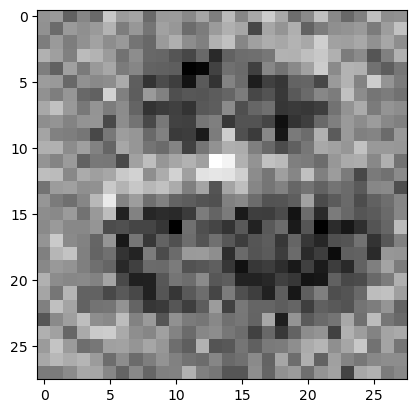

In [43]:
#《Py神经网络编程》塔里克·拉希德，人民邮电出版社，出版时间2018-04，第2章第4节编程实例
# zpf2617，测试环境anaconda base Python 3.9.13
#2022.10.26测试，测试原代码地址：https://github.com/zpf2617
#感谢这本书让我这个0基础的人从头手撸了一个神经网络！感谢作者！感谢微信读书让我免费读了这本书！新疆库尔勒疫情期间无聊的生活里的一点小乐趣，希望自己能扛过去，希望家人健康平安，媳妇早早回家
#MNIST数据集的下载地址：https://pjreddie.com/projects/mnist-in-csv/,原书源代码：https://github.com/makeyourownneuralnetwork
##增加世代，重复训练，可以减小训练样本数量，提高计算准确率，比如循环训练训练样本5遍，训练太多遍会过度拟合，只对特定样本敏感epochs=5
#所有可以修改和应该修改的变量：所有路径（权重保存和读取最好默认）、170行epochs训练循环次数、151行hidden_nodes隐藏层节点数量、
#、157行learning_rate学习率、255行label标签（0~9)
import numpy    #生成矩阵、数组、整体分布、随机数
import scipy    #sigmoid激活函数
import pandas as pd     ##pandas保存权重
import matplotlib.pyplot
# 装饰器，语法糖，确保图形显示在编辑器里面，不会单独弹出窗口
%matplotlib inline
#神经网络类定义
class neuralNetwork:
    #三层神经网络(输入、隐藏、输出)结构
    #初始化神经网络
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes  #输入层节点数量
        self.hnodes=hiddennodes  #隐藏层节点数量
        self.onodes=outputnodes  #输出层节点数量
        self.lr=learningrate  #学习率

        #链接权重矩阵，wih 和 who ,weight input hidden   and  weight hidden output
        #节点 i 到 节点 j（下一层）之间的链接用数组里的权重 w_i_j表示，比如w11 w21 w12 w22 等等。
        #链接权重矩阵初始化方式（1）（2）两种任选其一

        #链接权重矩阵初始化方式（1）：平均随机采样，
        self.wih=numpy.random.rand(self.hnodes,self.inodes)-0.5     #输入节点隐藏节点权重矩阵，随机数0-1之间，权重数值在（-0.5 至0.5)之间
        self.who=numpy.random.rand(self.onodes,self.hnodes)-0.5     #隐藏节点输出节点权重矩阵，随机数0-1之间，权重数值在（-0.5 至0.5)之间

        #链接权重矩阵初始化方式（2）：正态分布随机采样，【1/根号下(传入连接数目)】。参考分布中心值，标准方差，数组大小（12572640）
        # self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))       #输入节点隐藏节点权重矩阵，pow:节点数目的-0.5次方，中心点0.0，标准方差，数组大小
        # self.who=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))       #隐藏节点输出节点权重矩阵，pow:节点数目的-0.5次方，中心点0.0，标准方差，数组大小

        #sigmoid激活函数,定义
        self.activation_function=lambda x: scipy.special.expit(x)       #scipy.special.expit(x)=sigmoid(x)激活函数，lambda 匿名函数，接受x并返回处理结果
        self.inverse_activation_function = lambda x: scipy.special.logit(x)     #反向激活函数，  y=f(x),现在x=F(y)

    #训练神经网络
    def train(self,inputs_list,targets_list):
        #第一部分：针对训练样本计算输出
        #第二部分：计算输出结果和给定目标结果差值返回更新网络权重，反向传播
        
        #把输入inputs信号,targets(给定的，人判断出来的，准确的）目标列表list转换成2维数组array
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T

        #信号从输入传至输出。。。。         和query()里面市一样的
        #计算隐藏层节点输入信号=输入隐藏层节点权重 点乘dot 输入信号 
        hidden_inputs=numpy.dot(self.wih,inputs)
        #隐藏层输出信号=激活函数（隐藏层节点输入信号）
        hidden_outputs=self.activation_function(hidden_inputs)
        #输出层节点输入信号=输出隐藏层节点权重 点乘dot 隐藏层输出信号
        final_inputs=numpy.dot(self.who,hidden_outputs)
        #输出层节点输出信号=激活函数（输出层节点输入信号）
        final_outputs=self.activation_function(final_inputs)

        #计算误差：（输出层输出信号）误差=目标值-计算值
        #目标值(给定的，人判断出来的，准确的，预期目标值）-计算值（机器用随机权重网络算的，有误差不准确的，随机猜数字，如果跟结果不对，更新计算方法，直到计算接近正确）
        output_errors=targets-final_outputs

        #误差分割原理，按比例分割，不涉及激活函数问题，隐藏层输出信号的误差=输出层输出信号误差/权重，比如权重大的贡献的误差也大，多少权重贡献多少误差，分割，求和得到总误差
        hidden_errors=numpy.dot(self.who.T,output_errors)

        #权重更新矩阵，反向传播关键步骤,应用梯度下降法,推导过程如下
        #其中：final_outputs*(1.0-final_outputs) ->激活函数simoid(x)求导simoid(x)*(1-simoid(x))
        #simoid(x)=final_outputs,即激活函数sigmoid(输出层输入信号final_inputs)=final_outputs,如f(x)=y
        #微积分德尔塔△表示微小变化，则：梯度下降原理
        # （1）权重+=权重的变化   等于   权重=权重+权重的变化
        #  (2)权重的变化 = 学习率(控制步长，避免超调) * 输出层输出信号的变化（输出层输出信号对权重w求导) ÷ 隐藏层输出信号（矩阵转置表除法÷）
        #   既：Who△=lr*Fin△ ÷ Hout，权重变化=（输出误差/输入信号（隐藏层的输出信号））*误差函数对权重的求导叫做变化
        #   既：输出△=输入*权重△      输入信号*权重变化=输出变化    ，权重求和问题由矩阵完成，不必细分
        #隐藏节点输出节点权重矩阵更新
        self.who+=self.lr * numpy.dot(output_errors*final_outputs*(1.0-final_outputs),numpy.transpose(hidden_outputs))

        #输入节点隐藏节点权重矩阵更新
        self.wih+=self.lr * numpy.dot(hidden_errors*hidden_outputs*(1-hidden_outputs),numpy.transpose(inputs))

    #查询神经网络
    def query(self,inputs_list):

        #把输入inputs信号列表list转换成2维数组array
        inputs=numpy.array(inputs_list,ndmin=2).T

        #信号从输入传至输出。。。。
        #计算隐藏层节点输入信号=输入隐藏层节点权重 点乘dot 输入信号 
        hidden_inputs=numpy.dot(self.wih,inputs)
        #隐藏层输出信号=激活函数（隐藏层节点输入信号）
        hidden_outputs=self.activation_function(hidden_inputs)
        #输出层节点输入信号=输出隐藏层节点权重 点乘dot 隐藏层输出信号
        final_inputs=numpy.dot(self.who,hidden_outputs)
        #输出层节点输出信号=激活函数（输出层节点输入信号）
        final_outputs=self.activation_function(final_inputs)

        #返回输出层节点输出信号
        return final_outputs
        pass

    # 反向查询神经网络
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # 把列表数据转换成用于计算的numpy数组
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # 输出层输入信号=反向激活函数（输出层输出信号）
        final_inputs = self.inverse_activation_function(final_outputs)

        # 隐藏层输出=输出层输入/隐藏节点输出节点权重矩阵   逆矩阵.T = ÷
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # 反向归一化大致
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # 隐藏层输入=反向激活函数（隐藏层输出信号）
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # 输入层输出=输入=隐藏层输入/输入节点隐藏节点权重矩阵
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

# #定义输入层、隐藏层、输出层节点数量,学习率
# input_nodes=784
# hidden_nodes=100
# output_nodes=3
# learning_rate=0.3

# #创建神经网络实例
# n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
# inputlist=[1.0,0.5,-1.5]
# n.query(inputlist)


# 进行MNIST的神经网络训练

# 输入层有784个变量（28*28个像素点）
input_nodes = 784

# 隐藏层有200个变量（这个由自己定）
hidden_nodes = 200

# 输出层有10个变量（10个数字）
output_nodes = 10

# 学习率为0.1、0.3
learning_rate = 0.1
# 搭建一个神经网络
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

training_data_file = open("C:/mnist_train_60000.csv",'r')
# C:/myMNIST.csv,读取训练样本
# training_data_file = open("C:/myMNIST_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


i = 1
#增加世代，重复训练，比如循环训练训练样本5遍，训练太多遍会过度拟合，只对特定样本敏感
epochs=0
for e in range(epochs):
# 训练数据集，共计785列数据，第一列是目标值0~9  ->all_values[0]，第2至785列->all_values[1:]  共计784=28*28个0~255灰度值。
    for record in training_data_list:

        # 把每一个record都用逗号隔开
        all_values = record.split(',')
        # 将颜色代码用0~1归一化
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01       #归0~1，然后0.01~0.99,确保输入不等于0，#numpy.asfarray功能列表转化为浮点数数组，整数加个1.0变浮点数.
        targets = numpy.zeros(output_nodes) + 0.01      #numpy.zeros功能为0.0的数组1行10列（output_nodes输出节点），然后每个元素加0.01
        #数据第一列标签0~9,10，数据第一列标签0~9,10列的一维数组的第0~9个数据等于0.99，其余是0.01，例如标签4， targets=[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]
        targets[int(all_values[0])] = 0.99
        # 给定目标，让神经网络学习。
        n.train(inputs,targets)
        pass
        #打印i可以看到运行进度，不然黑乎乎的，训练等的太着急
        print(i)
        i += 1
    pass




#训练完保存权重,如果训练循环（世代）等于0，则不训练，直接读取前一次训练的结果，如果不等于0，则保存训练结果的权重
#权重固定，测试结果就固定了
pass

if epochs == 0:
    df_wih_r=pd.read_csv("df_wih.csv",header=None,index_col=0)  #header=None，不是header=0，否则会把第一行当成表头，数据少了1行，
    df_who_r=pd.read_csv("df_who.csv",header=None,index_col=0)  #index_col=0，索引设置在第一列，否则读取的结果会多1列索引，数组大小就不一样了
    n.wih=df_wih_r.to_numpy()
    n.who=df_who_r.to_numpy()
#     print("epochs=0",epochs)
else:    
    df_wih=pd.DataFrame(n.wih)
    df_who=pd.DataFrame(n.who)
    df_wih.to_csv("df_wih.csv",header=None)
    df_who.to_csv("df_who.csv",header=None)

print("epochs",epochs)





# 检验神经网络编程训练的结果是否准确
#读取测试样本
testing_data_file = open("C:/mnist_test_10000.csv",'r')
# testing_data_file = open("C:/myMNIST_test.csv",'r')
testing_data_list = testing_data_file.readlines()
testing_data_file.close()

#测试成绩得分列表
score_card = []
j = 1
# 循环结构
for record in testing_data_list:
    # 把每一个record都用逗号隔开
    all_values = record.split(',')
    # 将颜色代码用0~1归一化
    correct_label = int(all_values[0])
    # 测试这个数据集应该对应着哪一个数
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs)
    # 选择特征值最大的数字
    label = numpy.argmax(outputs)
    # 计算得分，计算结果和目标一直加1分，否则不得分。
    if label == correct_label:
        score_card.append(1)
    else:
        score_card.append(0)
        print("计算错误的测试样本是第  :",j," 个，目标",correct_label,",计算结果",label)
    # print(j)
    j += 1

# 看看最后得到了多少分，并求出其百分比。
#200个训练样本，识别准确率大概60%左右，10000个样本准确率大概90%左右，60000个MNIST样本准确率大概95，1个训练循环情况下，概率的不确定性跟权重初始值和网络结构有关

score_card_array = numpy.asarray(score_card)
print(f"重复%-6.4d代训练"%(epochs),end="****\n\n")
print('performance =',score_card_array.sum()/score_card_array.size)

# run the network backwards, given a label, see what image it produces
#设置目标标签开始测试向后查询
label = 2
# 创建输出目标信号，第N列=0.99，其他没信号的给一个0.01，不用0防止训练进入死去，0乘任何数字等于0
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# 反向查询函数，输入目标值，得到神经网络输入图像数据，10个节点-隐藏节点-输出784个节点一行数据，一维数组，后期可以卷积，考虑图像的二维属性
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')
#


样本模板： 2


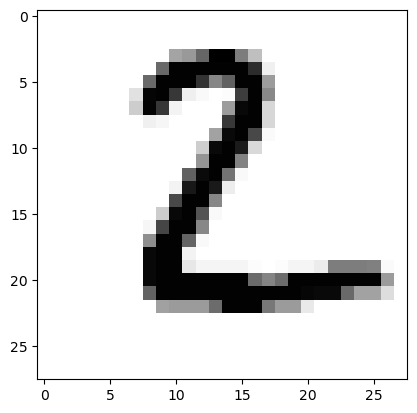

In [2]:
#MNIST数据绘图，结果检查
import numpy
import matplotlib.pyplot    #把csv格式的MNIST数据显示出来
# import maplotlib.pyplot
#装饰器，只用matplotlib.pyplot 绘图，装饰器后面不能加注释
%matplotlib inline  

# numpy.arange(n).reshape(a, b)    #依次生成n个自然数，并且以a行b列的数组形式显示
# print(numpy.arange(16).reshape(2, 8) ) 


#一次性读取文件
data_file = open("C:/mnist_test_100.csv",'r')

# data_file = open("C:/myMNIST.csv",'r')    #自建的MNIST样本
data_list = data_file.readlines()
data_file.close()
#数据集第n条数据（从1开始）第n行

#调整这个行数来显示
n=9

all_values=data_list[n-1].split(",")
image_array=numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation='None')

print("样本模板：",all_values[0])

In [193]:
#生成自己的MNIST验证样本
#首先准备图片，在photoshop里面新28*28像素的JPG白底黑字jPG格式，surface pen手写数字，可以用动作录制更快，放在一个文件夹里批量读取
#生成myMNIST.csv后要把第一列索引从文件名改成目标值（0-9）

# from scipy import misc
# for PIL
# # img_array=misc.imread(r"C:\Users\zero\.ipython\myMNIST\000.jpg")
# lena = scipy.misc.lena() 
# from PIL import Image
# import matplotlib.pyplot    #把csv格式的MNIST数据显示出来
# # import maplotlib.pyplot
# #装饰器，只用matplotlib.pyplot 绘图，装饰器后面不能加注释
# %matplotlib inline  
# image=Image.open(r"C:\Users\zero\.ipython\myMNIST\000.jpg")
# ig=image.convert("L")
# image.show()
# ig.show()
# import cv2
# img = cv2.imread(path)
# print(type(img))
import os
import pandas as pd
import matplotlib.image as mp
%matplotlib inline


file_list=[]        #文件名列表
# df=pd.DataFrame(index=range(30),columns=range(784))
df=pd.DataFrame(columns=range(784)) #新建一个数据784个字段，第一列是索引，后面把索引改成文件名，最后再根据文件名把索引手动改成样本目标值（0~9）
file_path = "C:\\Users\\zero\\.ipython\\myMNIST\\"
folders = os.listdir(file_path)
for file in folders:
        #判断文件后缀名是否为txt
        if(file.split('.')[-1]=='jpg'):     #用"."号把完整的文件名分割成  文件名    和(.)   后缀（jpg)
            # 打印所有txt文件名
            # print(file)
            file_list.append(file.split('.')[0])
            full_path=file_path+file
            img_array = mp.imread(full_path)  #图像读取为数组
            img_array=img_array.max(axis=2)   #图像灰度化，最大值法，
            # img_data=img_data.mean(axis=2)   #图像灰度化，平均值值法
            img_data=255-img_array.reshape(784)     #颜色值取反，图像和MNIST数据黑白相反，28*28转化为784，二维转化为一维数组
            # img_list=img_data.tolist()
            df.loc[len(df)]=img_data    #添加一行数据

            pass
print(file_list)
print(len(file_list))
df.index=file_list  #更新索引
print(len(folders))

print(df)

# print(img_array.shape)
# print(type(img_array))

  
# print(type(img_data))
# print(img_data)





# data2=data.append([1,2,3])
df.to_csv("myMNIST.csv",header=0)
# numpy.savetxt("myMNIST.csv",img_data,delimiter=",")
# img_data.tofile('myMNIST.csv',sep=',')      #tofile(）和savetxt（）保存结果一个是横，一个是竖
# img_data.tofile('myMNIST.csv',sep=',')      #tofile(）和savetxt（）保存结果一个是横，一个是竖
# numpy.savetxt("myMNIST.csv",img_data,delimiter=",")
# i=img_data.tolist()
# print(type(i))
# idata=",".join(str(i))
# print(idata)
# with open("myMNIST.csv","a") as f:
#     f.write(idata)

['0', '00', '000', '1', '11', '111', '2', '22', '222', '3', '33', '333', '4', '44', '444', '5', '55', '555', '6', '66', '666', '7', '77', '777', '8', '88', '888', '9', '99', '999']
30
30
     0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      0    0    0    0    0    0    0    0    2    0  ...    0    0    0   
00     0    0    0    0    0    0    0    0    1    0  ...    0    0    0   
000    0    0    0    0    0    0    0    0    4    0  ...    0    0    0   
1      0    0    0    0    0    0    0    0    0    4  ...    0    0    0   
11     0    0    0    0    0    0    0    0    0    6  ...    0    0    0   
111    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    2    6    2    0    0    1    0    3    0  ...    0    0    0   
22     0    4    2    0    0    0    0    1    0    0  ...    0    0    0   
222    3    0    0    1    1    0    0    0    0    3  ...    0    0    0   
3      0    0    0    0    0    0    0    0

performance =  0.97
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


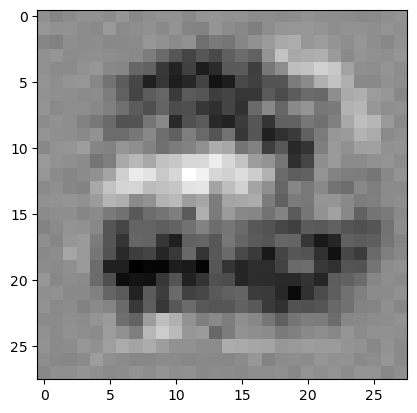

In [10]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version asks the network what the image should be, given a label
# (c) Tariq Rashid, 2016
# license is GPLv2

import numpy
# scipy.special for the sigmoid function expit(), and its inverse logit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs


# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)


# load the mnist training data CSV file into a list
training_data_file = open("C:\mnist_train_10000.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass



# load the mnist test data CSV file into a list
test_data_file = open("C:\mnist_test_100.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass


# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)


# run the network backwards, given a label, see what image it produces

# label to test
label = 2
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')





epochs 0
performance =  0.9709
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


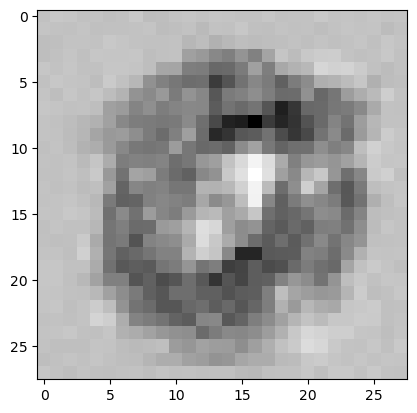

In [40]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version asks the network what the image should be, given a label
# (c) Tariq Rashid, 2016
# license is GPLv2
#pandas保存权重
import pandas as pd
import numpy
# scipy.special for the sigmoid function expit(), and its inverse logit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs


# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)


# load the mnist training data CSV file into a list
training_data_file = open("C:\mnist_train_60000.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 0

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass




#训练完保存权重,如果训练循环（世代）等于0，则不训练，直接读取前一次训练的结果，如果不等于0，则保存训练结果的权重
#权重固定，测试结果就固定了
pass
df_wih=pd.DataFrame(n.wih)
df_who=pd.DataFrame(n.who)
if epochs == 0:
    df_wih_r=pd.read_csv("df_wih.csv",header=None,index_col=0)  #header=None，不是header=0，否则会把第一行当成表头，数据少了1行，
    df_who_r=pd.read_csv("df_who.csv",header=None,index_col=0)  #index_col=0，索引设置在第一列，否则读取的结果会多1列索引，数组大小就不一样了
    n.wih=df_wih_r.to_numpy()
    n.who=df_who_r.to_numpy()
#     print("epochs=0",epochs)
else:    
    
    df_wih.to_csv("df_wih.csv",header=None)
    
    df_who.to_csv("df_who.csv",header=None)

print("epochs",epochs)

# print("前",n.wih)
# print("前",n.who)
# df_wih=pd.DataFrame(n.wih)
# df_wih.to_csv("df_wih1.csv",header=None)
# df_who=pd.DataFrame(n.who)
# df_who.to_csv("df_who1.csv",header=None)
# print("epochs=0",epochs)
# #读取保存的权重,当epochs=0,直接读取权重，不再训练
# df_wih_r=pd.read_csv("df_wih.csv",header=None,index_col=0)
# df_who_r=pd.read_csv("df_who.csv",header=None,index_col=0)


# # n.wih=df_wih_r.values
# # n.who=df_who_r.values
# n.wih=df_wih_r.to_numpy()
# n.who=df_who_r.to_numpy()
# print("后",n.wih)
# print("后",n.who)
# df_wih=pd.DataFrame(n.wih)
# df_wih.to_csv("df_wih2.csv",header=None)
# df_who=pd.DataFrame(n.who)
# df_who.to_csv("df_who2.csv",header=None)
# print("epochs=0",epochs)



# load the mnist test data CSV file into a list
test_data_file = open("C:\mnist_test_10000.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass


# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)


# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')



